**importing libraries**

**importing tensorflow**

In [73]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

**importing the MNIST dataset**

In [74]:
from tensorflow.keras.datasets import mnist , cifar10

**Loading the MNISTt dataset**

In [77]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Size of the dataset**

In [76]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Assigning the names to the columns**
Although the MNIST dataset doesnt have columns names we have assigned them for model imporoving, easier understanding of data and for model development.

In [78]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [79]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Visualization**
Visualitation of images

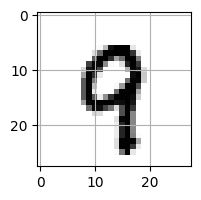

In [80]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[350], cmap=plt.cm.binary)
plt.grid(True)
plt.show()

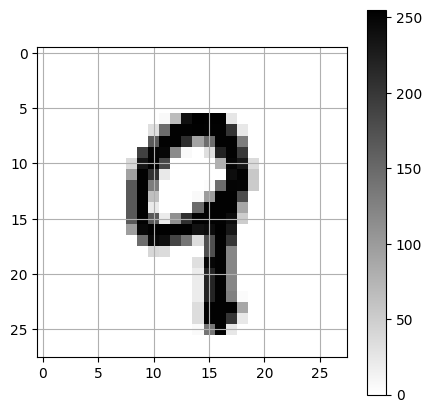

In [81]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[350], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

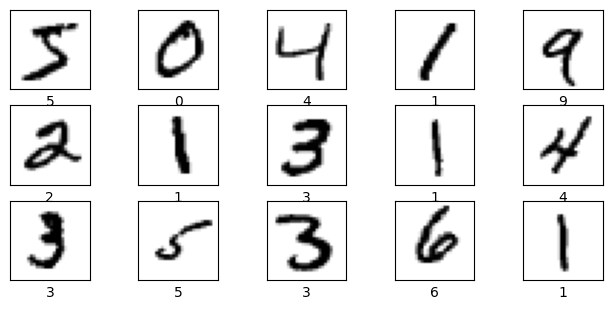

In [82]:
plt.figure(figsize=(8,6))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Normalization**
Dividing each pixel value by 255.0 scales the values to a range between 0 and 1.

In [83]:
train_images = train_images / 255.0
test_images = test_images / 255.0

By setting a fixed seed, you can guarantee that the same random numbers will be generated every time you run the code.

In [84]:
tf.random.set_seed(42)

It is used forClearing the model cache, Resetting the layer weights, Removing any existing models.

In [85]:
tf.keras.backend.clear_session()

**Building a neural network model using the Keras API**         
**Sequential model**

In [87]:
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
ann_model

<Sequential name=sequential_1, built=True>

In [89]:
ann_model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

**Compiling the ANN Model**



In [90]:
import os
import datetime

**Training the ANN Model**

In [117]:
ann_history = ann_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9979 - loss: 0.0083 - val_accuracy: 0.9770 - val_loss: 0.0919
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9982 - loss: 0.0072 - val_accuracy: 0.9753 - val_loss: 0.0984
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9763 - val_loss: 0.1044
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9762 - val_loss: 0.1016
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9772 - val_loss: 0.1025


In [93]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

The MNIST dataset consists of 28x28 parameter images

In [94]:
28 *28

784

In [95]:
784*128 + 128

100480

**Building a Convolutional Neural Network model using the Keras API**

In [101]:
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = cifar10.load_data()

In [103]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [104]:
x_train_cnn = x_train_cnn.astype('float32') / 255.0
x_test_cnn = x_test_cnn.astype('float32') / 255.0

In [105]:
cnn_model

<Sequential name=sequential_4, built=True>

In [106]:
cnn_model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [113]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,387,232 (5.29 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 924,822 (3.53 MB)

In [118]:
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7466 - loss: 0.7372 - val_accuracy: 0.6231 - val_loss: 1.1829
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7585 - loss: 0.7082 - val_accuracy: 0.6185 - val_loss: 1.2323
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7682 - loss: 0.6811 - val_accuracy: 0.6121 - val_loss: 1.2928
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7760 - loss: 0.6591 - val_accuracy: 0.6032 - val_loss: 1.3712
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7833 - loss: 0.6378 - val_accuracy: 0.5888 - val_loss: 1.5161


In [119]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

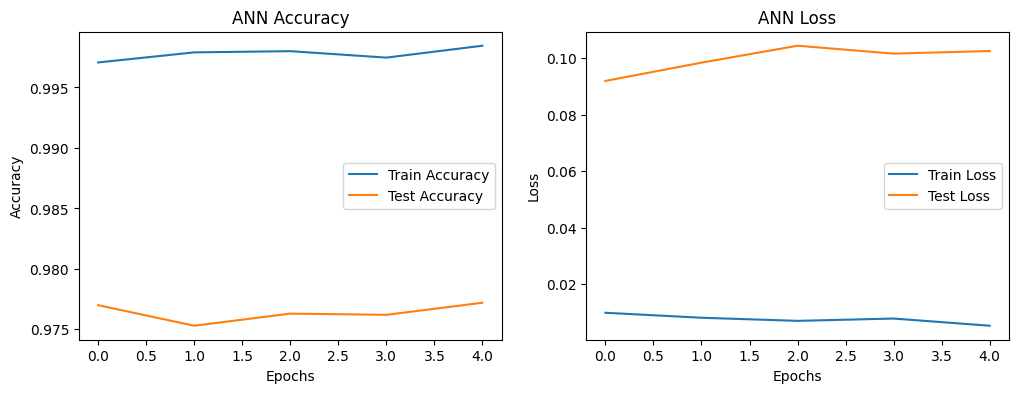

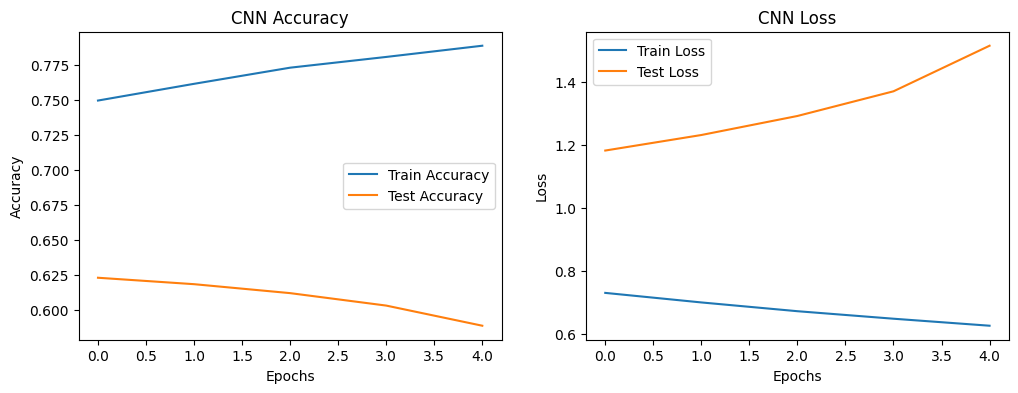

In [120]:
plot_history(ann_history, "ANN")
plot_history(cnn_history, "CNN")

In [126]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels)
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1160
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5893 - loss: 1.5014


In [127]:
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

ANN Test Accuracy: 0.9772
CNN Test Accuracy: 0.5888


From the above tensorboard visualizations.....                                 
comparing of ANN and CNN gave me a accuracy of 97.72 and 58.88                  
**From the above accuracy ANN is Better**

